### Import your librares

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast 
from collections import Counter
from wordcloud import WordCloud 

### Load your dataset

In [2]:
df = pd.read_csv('seattle_weather.csv')

In [5]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [7]:
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


<AxesSubplot: >

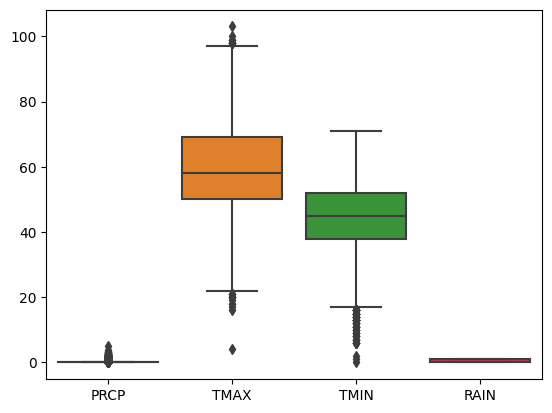

In [8]:
sns.boxplot(df)

In [19]:
q1,q3 = np.percentile(df['TMAX'],[25,75],interpolation='midpoint')
print('1st quart',q1)
print('3rd quart:',q3)

1st quart 50.0
3rd quart: 69.0


C:\Users\moaat\AppData\Local\Temp\ipykernel_20980\3117122746.py:1: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)



In [21]:
iqr =q3 - q1
print(iqr)
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)

19.0


<AxesSubplot: >

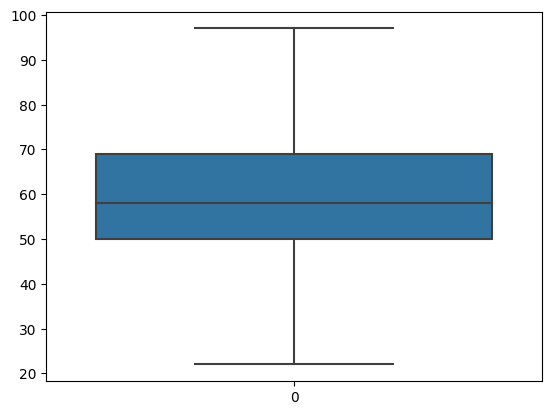

In [24]:
df2 = df[(df.TMAX<upper)&(df.TMAX>lower)]
sns.boxplot(df2['TMAX'])

<AxesSubplot: >

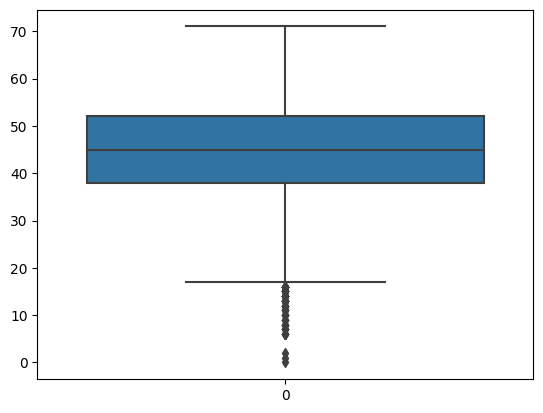

In [37]:
sns.boxplot(df['TMIN'])

In [38]:
q1,q3 = np.percentile(df['TMIN'],[25,75],interpolation='midpoint')
print('1st quart',q1)
print('3rd quart:',q3)
iqr =q3 - q1
print(iqr)
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
print('upper: ',upper)
print('lower: ',lower)

1st quart 38.0
3rd quart: 52.0
14.0
upper:  73.0
lower:  17.0


C:\Users\moaat\AppData\Local\Temp\ipykernel_20980\2107266397.py:1: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)



<AxesSubplot: >

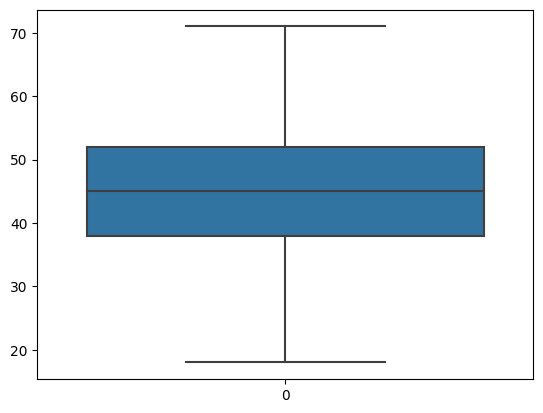

In [39]:
df2 = df[(df.TMIN<upper) & (df.TMIN>lower)]
sns.boxplot(df2['TMIN'])